(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Clustering

## Gaussian mixture

In [ ]:
# Generate data
N = 3
x0 = np.array([])
for i in range(N):
    x = np.random.normal(size=10) + 5*i
    x0 = np.hstack([x0, x])
x0 = x0.reshape((len(x0), 1))

In [6]:
from sklearn import datasets, mixture, metrics
import numpy as np

In [7]:
# use iris data set, see performance for different measures
data = datasets.load_iris()
X = data.data
Y = data.target

gmm = mixture.GaussianMixture()

result = []
for n in range(2, 10):
    gmm.set_params(n_components=n)
    gmm.fit(X)
    Yp = gmm.predict(X)
    result.append([
            metrics.cluster.adjusted_rand_score(Y, Yp), 
            metrics.cluster.adjusted_mutual_info_score(Y, Yp),
            metrics.cluster.homogeneity_score(Y, Yp), 
            metrics.cluster.completeness_score(Y, Yp),
            metrics.cluster.v_measure_score(Y, Yp), 
            metrics.cluster.silhouette_score(X, Yp)
            ])
result = np.array(result)

In [9]:
result.shape

(8, 6)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

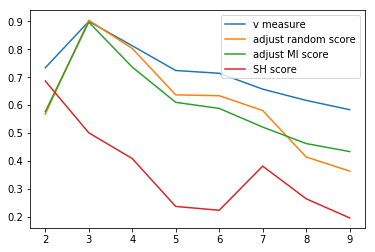

In [21]:
#plt.plot(range(2, 10), result[:, 2], label='Homogeniety')
#plt.plot(range(2, 10), result[:, 3], label='Completeness')
plt.plot(range(2, 10), result[:, 4], label='v measure')
plt.plot(range(2, 10), result[:, 0], label='adjust random score')
plt.plot(range(2, 10), result[:, 1], label='adjust MI score')
plt.plot(range(2, 10), result[:, 5], label='SH score')
plt.legend()

In [ ]:
# 1. run code, plot result
# 2. understand why?
# 3. choose which one woudl be the preferred one to use (or your preferred way to use)

In [ ]:
# explore the difference between scores

In [ ]:
# Excercise: try following data sets, see how the different scores perform
data = datasets.make_blobs(n_samples=200, centers=5, random_state=0, cluster_std=0.4)
X = data[0]
Y = data[1]

## K-mean

In [ ]:
# this is like the dice-problem in investiment banking interview ...
# http://www.naftaliharris.com/blog/visualizing-k-means-clustering/ 

In [ ]:
# Given N points, and m clusters 
# random assign m cluster center to any points within in the N
# calculate the nearby points N => m 
# N: (1, 2, 3, 1, 2, 4 ,3 ,1 ,3 )
# update m cooridnation: 1 cluster => update coordinate
# N: (1 ,1 ,2, 1, 3, 4, 2, 3, 4,)
# update m coordinate: 
# ...... (100 iteration)
# m cluster center 

In [ ]:
# use iris data set, see performance for different measures

In [22]:
from sklearn import cluster

In [28]:
c_km = cluster.KMeans(n_clusters=3)

In [29]:
c_km.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
# Excercise: Check the K-mean's different random state & max_iteration number
# change different centers # and KMean cluster # 

# change k-mean++ into other simple initialization method 

## Hierachical clustering

In [ ]:
# Hierarchical clustering is a general family of clustering algorithms 
# that build nested clusters by merging or splitting them successively.

In [ ]:
# AgglomerativeClustering

## DBSCAN

In [ ]:
# DBSCAN
# The DBSCAN algorithm views clusters as areas of high density separated by areas of low density.
# http://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Yp, cmap='Spectral')

In [ ]:
# K-mean, Gaussian Mixture, DBSCAN, AggregrateClustering

In [ ]:
# Speed test

In [40]:
Nc = 5
data = datasets.make_blobs(n_samples=1000, n_features=100, centers=Nc, random_state=0)
X = data[0]
Y = data[1]

In [41]:
%%time
model = cluster.KMeans(n_clusters=Nc)
model.fit(X)
result = model.predict(X)

CPU times: user 144 ms, sys: 6.34 ms, total: 151 ms
Wall time: 39.7 ms


In [42]:
%%time
model = cluster.AgglomerativeClustering(n_clusters=Nc)
model.fit(X)
result = model.labels_

CPU times: user 70.1 ms, sys: 10.4 ms, total: 80.6 ms
Wall time: 74.9 ms


In [43]:
%%time
model = cluster.DBSCAN()
model.fit(X)
result = model.labels_

CPU times: user 60.6 ms, sys: 1.71 ms, total: 62.3 ms
Wall time: 60.9 ms


In [44]:
%%time
model = mixture.GaussianMixture()
model.fit(X)
result = model.predict(X)

CPU times: user 34.6 ms, sys: 2.79 ms, total: 37.3 ms
Wall time: 10.5 ms


In [ ]:
# 100:   D > G > A > K
# 1000:  G > K > D > A
# 10000: G > K > D > A
# K A D G

# Outlier detection

In [ ]:
## one-class SVM (novelty detection)
## EclipseEnvelop (outlier detection)

In [ ]:
X = np.random.normal(size=100)
X = X[abs(X)<3]
X1 = np.random.normal(loc=3.0, size=10)
X2 = np.concatenate([X,X1])

print X.shape, X1.shape, X2.shape

## One class SVM

In [ ]:
model = svm.OneClassSVM(nu=0.1, gamma=0.1)

In [ ]:
plt.scatter(range(len(X2)), X2, c=model.predict(X2.reshape(-1,1)), cmap='summer')

## EclipseEnvelop

In [45]:
# define a dataset with in & out datasets
n_in = 100
n_out = 20
offset = np.array([1, 1]) * 0.1 
X1 = np.random.randn(n_in, 2) + offset
X2 = np.random.randn(n_in, 2) - offset

Xout = np.random.uniform(low=-6, high=6, size=(n_out, 2))

In [46]:
X = np.vstack([X1, X2, Xout])

In [51]:
from sklearn import covariance, svm

/Users/peter/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


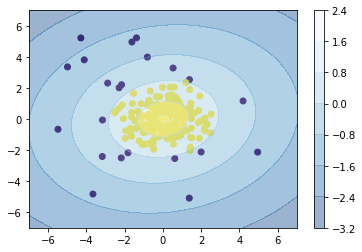

In [52]:
cee = covariance.EllipticEnvelope(contamination=0.1, random_state=1)
cee.fit(X)
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))

plt.scatter(X[:,0], X[:,1], c=cee.predict(X))

Z = cee.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.4)
plt.colorbar()

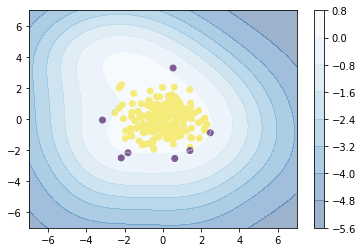

In [53]:
cee = svm.OneClassSVM(kernel='rbf', nu=0.1, gamma=0.1)
cee.fit(X)
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))

plt.scatter(np.vstack([X1, X2])[:,0], np.vstack([X1, X2])[:,1], c=cee.predict(np.vstack([X1, X2])))

Z = cee.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.4)
plt.colorbar()